# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


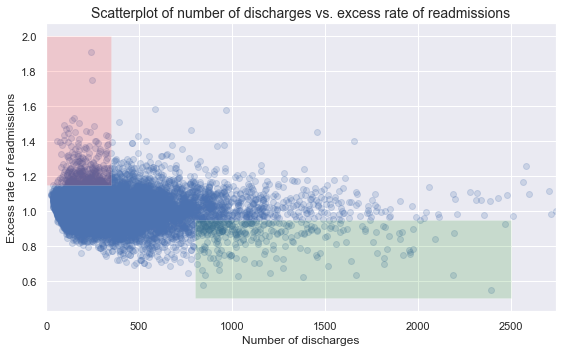

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A. Do you agree with the above analysis and recommendations? Why or why not?

Although the analysis and recommendations seem reasonable on surface, I cannot totally agree with them. There are two reasons:
1. Analysis merely based on intuitive visualization is unsolid, we need more statistacal test to verify it.

2. There are other factors may affect then readmission rate which the analysis didn't take into consideration. Further investigation and analysis are still necessary.



# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

## 1. Setup an appropriate hypothesis test.

H0: There is no significant correlation between the number of discharges and the readmission rate.

Ha: There is significant correlation between the number of discharges and the readmission rate.    

## 2. Compute and report the observed significance value (or p-value).

In [6]:
# Drop all rows with NaN value
clean_hospital_read_df = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']]

clean_hospital_data = clean_hospital_read_df.dropna(axis=0,how='any')

In [7]:
num_of_discharges = clean_hospital_data['Number of Discharges']

excess_readmin_rate = clean_hospital_data['Excess Readmission Ratio']
pearson_r = np.corrcoef(num_of_discharges, excess_readmin_rate)[0, 1]

print(pearson_r)

-0.09739794351079353


In [8]:
perm_replicates = np.empty(10000)

for i in range(len(perm_replicates)):
    per_discharge = np.random.permutation(num_of_discharges)
    perm_replicates[i] = np.corrcoef(per_discharge,excess_readmin_rate)[0, 1]
    
p = sum(perm_replicates <= pearson_r)/len(perm_replicates)

print('P: ' + str(p))

P: 0.0


The P-value is smaller than 0.05 and the pearson_r is -0.1. 

There do have a weak correlation between the number of discharges and the readmission rate.

## 3. Report statistical significance for  𝛼  = .01.Report statistical significance for  𝛼  = .01.

The P value for the permutation test is 0.0, which is still smaller than 0.01. 

We can conclude that there is correlation between the number of discharges and the readmission rate under 99% confidence interval.

## 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

According to the analysis above, there do have a statistically significant correlation between the number of discharges and readmission. The pearson r test double confirmed this practical significance. However, the pearson r is as small as -0.1 in a -1~1 scale, which means the correlation between the number of discharges and readmission is very weak. 

Based on the statistical significance, we should advise hospitals to pay attention to number of discharges in order to lowever readmission rate. However, after looking at the practical significance, I wouldn't suggest them to do so because the correlation is too weak. The hospital may take a lot of efforts but receive little improvement.

## 5. Look at the scatterplot above.
+ What are the advantages and disadvantages of using this plot to convey information?
+ Construct another plot that conveys the same information in a more direct manner.

advantage: 
    display all data at once.
    imply a slightly negative relationship between number of discharges and readmisssion rate.
    highlight the data with extreme high or low readmissionrate for better understanding.    
disadvantage:
    not quited clear about the exact relationship and the trend between number of discharges and readmisssion rate. A line representing the correlation should be added. 

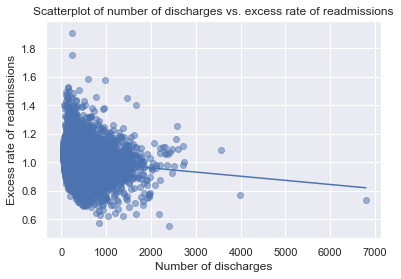

In [9]:
import seaborn as sns
sns.set()
plt.scatter(num_of_discharges, excess_readmin_rate, alpha=0.5)
slope, intercept = np.polyfit(num_of_discharges, excess_readmin_rate, 1)
x = np.array([0, max(num_of_discharges)])
y = slope * x + intercept
plt.plot(x, y)
plt.xlabel('Number of discharges')
plt.ylabel('Excess rate of readmissions')
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions')

plt.show()